In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import itertools

In [57]:
mpl.rcdefaults()
plt.style.use(["../stylesheet.mplstyle"])
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [58]:
def print_mean_rounds(label, rounds, percentiles=[5, 50, 95]):
    print(f"{label}:")
    mean = np.mean(rounds)
    stderr = np.std(rounds, ddof=1) / np.sqrt(len(rounds))
    print(f"\t{mean} +/- {stderr} rounds")
    for p in percentiles:
        print(f"\t{p}%: {np.percentile(rounds, p)}")

In [59]:
FG_paths = {
    "Trivial": "../../sequential-learning-study/friedman-grosse-sl-trivial.csv",
    "Training Data": "../../sequential-learning-study/friedman-grosse-sl-training-data.csv",
    "Jackknife": "../../sequential-learning-study/friedman-grosse-sl-jackknife.csv",
    "Bootstrap": "../../sequential-learning-study/friedman-grosse-sl-bootstrap.csv"
}

In [60]:
thermoelectrics_paths = {
    "Trivial": "../../sequential-learning-study/thermoelectrics/4-objectives-trivial.csv",
    "Training Data": "../../sequential-learning-study/thermoelectrics/4-objectives-training-data.csv",
    "Jackknife": "../../sequential-learning-study/thermoelectrics/4-objectives-jackknife.csv",
    "Bootstrap": "../../sequential-learning-study/thermoelectrics/4-objectives-bootstrap.csv"
}

In [61]:
FG_results = {key: pd.read_csv(path)["rounds"].to_numpy() for (key, path) in FG_paths.items()}

In [62]:
thermoelectrics_results = {key: pd.read_csv(path)["rounds"].to_numpy() for (key, path) in thermoelectrics_paths.items()}

In [63]:
print("Synthetic data")
for key, rounds in FG_results.items():
    print_mean_rounds(key, rounds)
print("thermoelectrics data")
for key, rounds in thermoelectrics_results.items():
    print_mean_rounds(key, rounds)

Synthetic data
Trivial:
	35.96875 +/- 2.5717837779633106 rounds
	5%: 2.0
	50%: 43.0
	95%: 61.0
Training Data:
	41.796875 +/- 3.116550456795459 rounds
	5%: 2.1500000000000004
	50%: 51.0
	95%: 71.85
Jackknife:
	11.1875 +/- 1.4906911880916076 rounds
	5%: 1.0
	50%: 7.0
	95%: 37.64999999999995
Bootstrap:
	7.546875 +/- 0.9774058858145883 rounds
	5%: 1.0
	50%: 4.5
	95%: 22.69999999999999
thermoelectrics data
Trivial:
	328.0 +/- 25.09383184819323 rounds
	5%: 14.650000000000004
	50%: 308.5
	95%: 629.55
Training Data:
	230.578125 +/- 18.79359752364364 rounds
	5%: 19.15
	50%: 200.5
	95%: 532.4999999999998
Jackknife:
	241.46875 +/- 21.273282865229977 rounds
	5%: 35.2
	50%: 203.0
	95%: 567.65
Bootstrap:
	169.03125 +/- 19.549679400382455 rounds
	5%: 8.0
	50%: 124.5
	95%: 496.54999999999984


In [42]:
def results_violin_plot(ax, results_dict):
    num_categories = len(results_dict)
    quantiles = [[0.05, 0.95]] * num_categories
    ax.violinplot(results_dict.values(), showextrema=False, showmedians=True, quantiles=quantiles)
    ax.set_xticks([x + 1 for x in range(num_categories)], results_dict.keys())

In [43]:
FG_data = pd.read_csv("../../src/main/resources/friedman_grosse_data.csv")
FG_data_A = FG_data[FG_data["phase"] == "A"]
FG_data_B = FG_data[FG_data["phase"] == "B"]
FG_A_y = FG_data_A["y"].to_numpy()
FG_A_z = FG_data_A["z"].to_numpy()
FG_B_y = FG_data_B["y"].to_numpy()
FG_B_z = FG_data_B["z"].to_numpy()

In [44]:
def plot_synthetic_data(ax):
    ax.scatter(FG_A_y, FG_A_z, label="A phase", color=colors[1])
    ax.scatter(FG_B_y, FG_B_z, label="B phase", color=colors[2])
    ax.hlines(22.0, xmin=22.0, xmax=28.0, linestyles='dashed', colors='k')
    ax.vlines(22.0, ymin=22.0, ymax=30.0, linestyles='dashed', colors='k')
    ax.set_xlabel("first output")
    ax.set_ylabel("second output")
    ax.legend(loc="center left")

In [45]:
df_thermoelectrics = pd.read_csv("../../thermoelectrics_raw.csv")
outputs = {
    "power": "Power factor (W*m/K^2)",
    "ZT": "ZT",
    "kappa": "Thermal conductivity (W/(m*K))",
    "Seebeck": "Seebeck coefficient (uV/K)"
}
data = {key: df_thermoelectrics[outputs[key]].to_numpy() for key in outputs.keys()}
thresholds = {
    "ZT": 1.25,
    "power": 5e-3,
    "kappa": 1.5,
    "Seebeck": 175
}

In [13]:
def plot_thermoelectrics_data(ax):
    vX = "power"
    vY = "ZT"
    vColor = "Seebeck"
    vShape = "kappa"
    color = [True if value > thresholds[vColor] else False for value in data[vColor]]
    yesmarker = '*'
    nomarker = '.'
    cmap = LinearSegmentedColormap.from_list(
        "my_cmap",
        [colors[2], colors[1]],
        N=2
    )
    marker = [yesmarker if value > thresholds[vShape] else nomarker for value in data[vShape]]
    yesmask = [m == yesmarker for m in marker]
    nomask = [m == nomarker for m in marker]
    
    scatter1 = ax.scatter(
        data[vX][nomask],
        data[vY][nomask],
        c=np.array(color)[nomask],
        cmap=cmap,
        marker=nomarker,
        label="False"
    )
    scatter2 = ax.scatter(
        data[vX][yesmask],
        data[vY][yesmask],
        c=np.array(color)[yesmask],
        cmap=cmap,
        marker=yesmarker,
        label="True"
    )
    ax.hlines(thresholds[vY], xmin=thresholds[vX], xmax=max(data[vX]), linestyles='dashed', colors='k')
    ax.vlines(thresholds[vX], ymin=thresholds[vY], ymax=max(data[vY]), linestyles='dashed', colors='k')
    ax.set_xlabel(outputs[vX])
    ax.set_ylabel(outputs[vY])
    legend1 = ax.legend(*scatter1.legend_elements(), title=f"{vColor}", loc="lower right")
    legend1.get_texts()[0].set_text("False")
    legend1.get_texts()[1].set_text("True")
    ax.add_artist(legend1)
    ax.legend(title=f"{vShape}", loc="upper left")

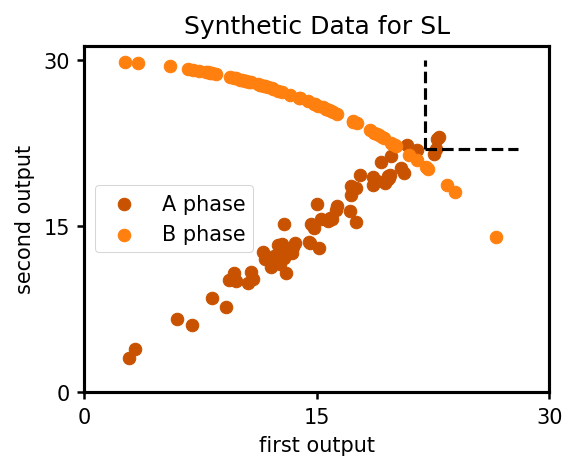

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3))
plot_synthetic_data(ax)
ax.set_title("Synthetic Data for SL")
ax.set_xticks([0, 15, 30])
ax.set_yticks([0, 15, 30])
plt.savefig("synthetic_data.png")

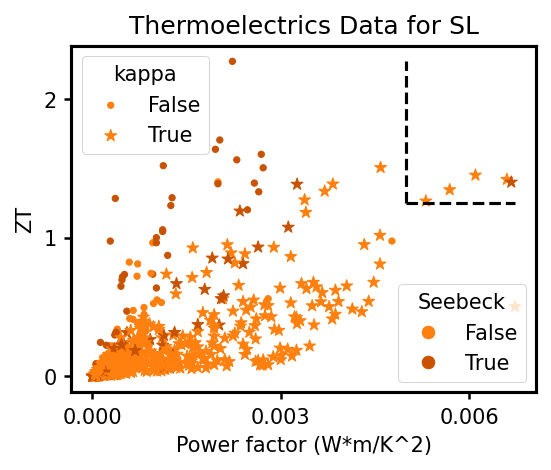

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3))
plot_thermoelectrics_data(ax)
ax.set_title("Thermoelectrics Data for SL")
ax.set_xticks([0, 0.003, 0.006])
ax.set_yticks([0, 1, 2])
plt.savefig("thermoelectrics_data.png")

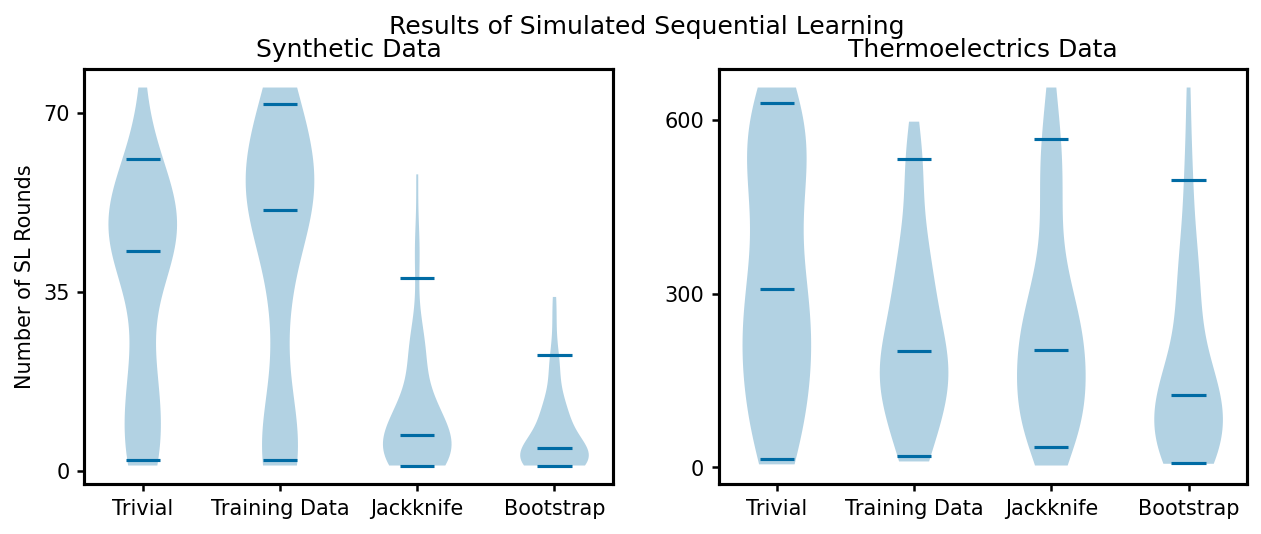

In [65]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.6))
results_violin_plot(axs[0], FG_results)
results_violin_plot(axs[1], thermoelectrics_results)
axs[0].set_title("Synthetic Data")
axs[1].set_title("Thermoelectrics Data")
axs[0].set_yticks([0, 35, 70])
axs[1].set_yticks([0, 300, 600])
axs[0].set_ylabel("Number of SL Rounds")
plt.suptitle("Results of Simulated Sequential Learning")
plt.savefig("fig4.svg")